In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
from setting import Setting
from protocols import aloha, slotted_aloha, csma, csma_cd

import matplotlib.pyplot as plt

In [129]:
st = Setting(host_num=3, total_time=100, packet_num=4, max_collision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1, seed=109550031)

In [130]:
print('aloha')
a_success, a_idle, a_collision = aloha(st, show_history=True)
print('success_rate: ' + str(a_success))
print('idle_rate: ' + str(a_idle))
print('collision_rate: ' + str(a_collision))

aloha
           V                                               V            V                     V         
h0: .......<--->...........................................<---|......<---|...................<---|.....
                              V                V                            V       V                   
h1: ..........................<---|................<---><---|.............<---|.................<---|...
                 V    V      V                                                           V              
h2: .............<---><--->..<---|.<--->.................................................<--->..........
success_rate: 0.3
idle_rate: 0.4
collision_rate: 0.3


In [131]:
print('slotted_aloha')
sa_success, sa_idle, sa_collision = slotted_aloha(st, show_history=True)
print('success_rate: ' + str(sa_success))
print('idle_rate: ' + str(sa_idle))
print('collision_rate: ' + str(sa_collision))

slotted_aloha
           V                                               V            V                     V         
h0: ..........<--->........................................<--->..........<--->...............<--->.....
                              V                V                            V       V                   
h1: ..............................<--->..........<--->.........................<---><--->...............
                 V    V      V                                                           V              
h2: ...............<---><---><--->.......................................................<--->..........
success_rate: 0.6
idle_rate: 0.4
collision_rate: 0.0


In [132]:
print('csma')
c_success, c_idle, c_collision = csma(st, show_history=True)
print('success_rate: ' + str(c_success))
print('idle_rate: ' + str(c_idle))
print('collision_rate: ' + str(c_collision))

csma
           V                                               V            V                     V         
h0: .......<--->...........................................<---|.................<---|..........<---><--
                              V                V                            V       V                   
h1: ..........................<---|.......................<---|...................<---|...<---|.........
                 V    V      V                                                           V              
h2: .............<---><--->..<---|...............<--->...................................<---|..........
success_rate: 0.25
idle_rate: 0.48
collision_rate: 0.27


In [133]:
print('csma_cd')
cd_success, cd_idle, cd_collision = csma_cd(st, show_history=True)
print('success_rate: ' + str(cd_success))
print('idle_rate: ' + str(cd_idle))
print('collision_rate: ' + str(cd_collision))

csma_cd
           V                                               V            V                     V         
h0: .......<--->...........................................<--->........<--->.....................<--|..
                              V                V                            V       V                   
h1: ..........................<|...............<---><--->..........................................<|...
                 V    V      V                                                           V              
h2: .............<---><--->..<--|......................................................<---><--->.......
success_rate: 0.45
idle_rate: 0.47
collision_rate: 0.08


##### Q1. Influence of Host Num

In [124]:
host_num_list = [2,3,4,6]
packet_num_list = [1200,800,600,400]

aloha_success = []
slotted_success = []
csma_success = []
csmacd_success = []

aloha_idle = []
slotted_idle = []
csma_idle = []
csmacd_idle = []

aloha_collision = []
slotted_collision = []
csma_collision = []
csmacd_collision = []

times = 100
for h, p in zip(host_num_list, packet_num_list):
    aloha_total_s = 0
    aloha_total_i = 0
    aloha_total_c = 0
    slotted_total_s = 0
    slotted_total_i = 0
    slotted_total_c = 0
    csma_total_s = 0
    csma_total_i = 0
    csma_total_c = 0
    csmacd_total_s = 0
    csmacd_total_i = 0
    csmacd_total_c = 0
    for ind in range(times):
        st = Setting(host_num=h, total_time=15000, packet_num=p, max_collision_wait_time=20, p_resend=0.3, packet_size=3, link_delay=1)
        s, i, c = aloha(st, show_history=False)
        aloha_total_s += s
        aloha_total_i += i
        aloha_total_c += c
        s, i, c = slotted_aloha(st, show_history=False)
        slotted_total_s += s
        slotted_total_i += i
        slotted_total_c += c
        s, i, c = csma(st, show_history=False)
        csma_total_s += s
        csma_total_i += i
        csma_total_c += c
        s, i, c = csma_cd(st, show_history=False)
        csmacd_total_s += s
        csmacd_total_i += i
        csmacd_total_c += c
    # aloha
    aloha_success.append(aloha_total_s/times)
    aloha_idle.append(aloha_total_i/times)
    aloha_collision.append(aloha_total_c/times)
    # slotted_aloha
    slotted_success.append(slotted_total_s/times)
    slotted_idle.append(slotted_total_i/times)
    slotted_collision.append(slotted_total_c/times)
    # csma
    csma_success.append(csma_total_s/times)
    csma_idle.append(csma_total_i/times)
    csma_collision.append(csma_total_c/times)
    # csma/cd
    csmacd_success.append(csmacd_total_s/times)
    csmacd_idle.append(csmacd_total_i/times)
    csmacd_collision.append(csmacd_total_c/times)

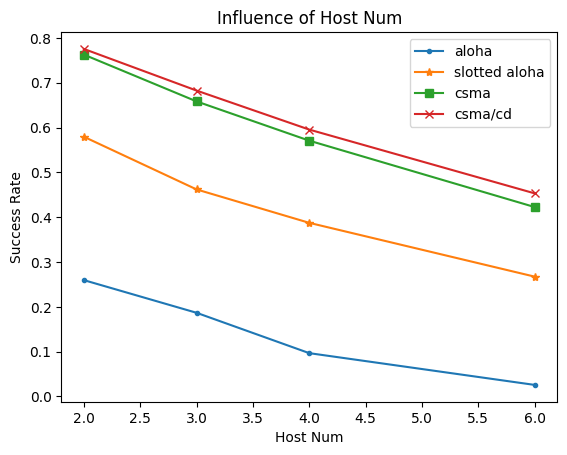

In [125]:
plt.plot(host_num_list, aloha_success, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_success, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_success, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_success, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Success Rate")
plt.legend()
plt.show()

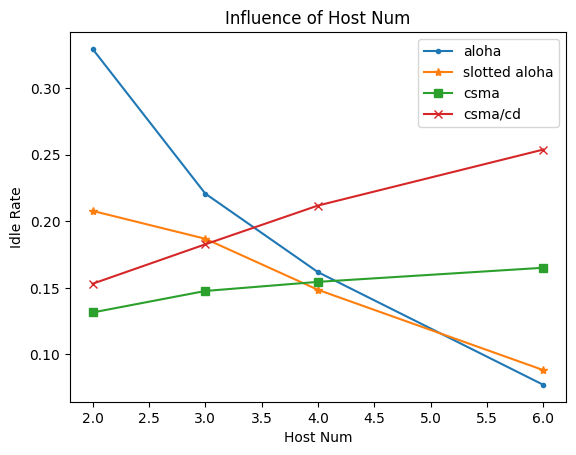

In [126]:
plt.plot(host_num_list, aloha_idle, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_idle, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_idle, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_idle, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Idle Rate")
plt.legend()
plt.show()

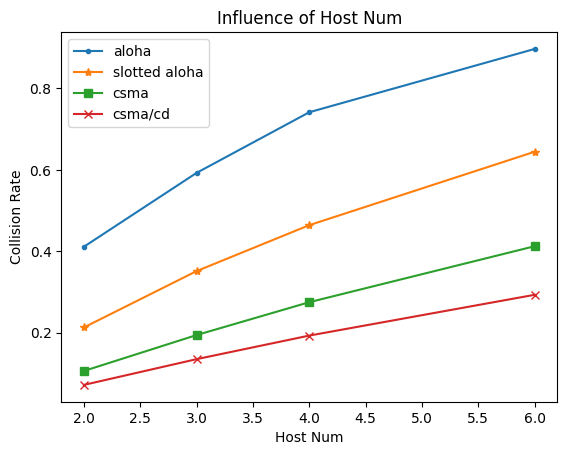

In [127]:
plt.plot(host_num_list, aloha_collision, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_collision, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_collision, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_collision, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Collision Rate")
plt.legend()
plt.show()

##### Q3. Influence of Host Num with coefficient = 1

In [121]:
host_num_list = [2,3,4,6]
packet_num_list = [1200,800,600,400]

aloha_success = []
slotted_success = []
csma_success = []
csmacd_success = []

aloha_idle = []
slotted_idle = []
csma_idle = []
csmacd_idle = []

aloha_collision = []
slotted_collision = []
csma_collision = []
csmacd_collision = []

times = 100
for h, p in zip(host_num_list, packet_num_list):
    aloha_total_s = 0
    aloha_total_i = 0
    aloha_total_c = 0
    slotted_total_s = 0
    slotted_total_i = 0
    slotted_total_c = 0
    csma_total_s = 0
    csma_total_i = 0
    csma_total_c = 0
    csmacd_total_s = 0
    csmacd_total_i = 0
    csmacd_total_c = 0
    for ind in range(times):
        st = Setting(host_num=h, total_time=15000, packet_num=p, coefficient=1, packet_size=3, link_delay=1)
        s, i, c = aloha(st, show_history=False)
        aloha_total_s += s
        aloha_total_i += i
        aloha_total_c += c
        s, i, c = slotted_aloha(st, show_history=False)
        slotted_total_s += s
        slotted_total_i += i
        slotted_total_c += c
        s, i, c = csma(st, show_history=False)
        csma_total_s += s
        csma_total_i += i
        csma_total_c += c
        s, i, c = csma_cd(st, show_history=False)
        csmacd_total_s += s
        csmacd_total_i += i
        csmacd_total_c += c
    # aloha
    aloha_success.append(aloha_total_s/times)
    aloha_idle.append(aloha_total_i/times)
    aloha_collision.append(aloha_total_c/times)
    # slotted_aloha
    slotted_success.append(slotted_total_s/times)
    slotted_idle.append(slotted_total_i/times)
    slotted_collision.append(slotted_total_c/times)
    # csma
    csma_success.append(csma_total_s/times)
    csma_idle.append(csma_total_i/times)
    csma_collision.append(csma_total_c/times)
    # csma/cd
    csmacd_success.append(csmacd_total_s/times)
    csmacd_idle.append(csmacd_total_i/times)
    csmacd_collision.append(csmacd_total_c/times)

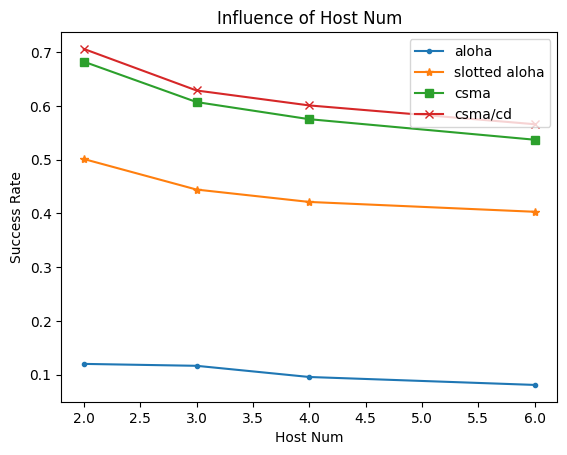

In [122]:
plt.plot(host_num_list, aloha_success, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_success, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_success, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_success, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Success Rate")
plt.legend()
plt.show()

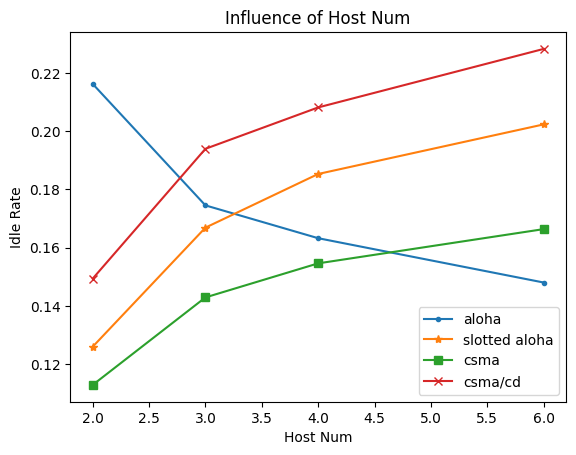

In [123]:
plt.plot(host_num_list, aloha_idle, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_idle, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_idle, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_idle, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Idle Rate")
plt.legend()
plt.show()

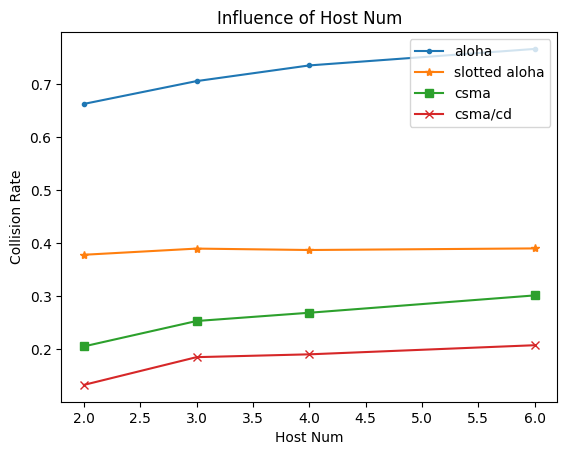

In [65]:
plt.plot(host_num_list, aloha_collision, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_collision, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_collision, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_collision, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Collision Rate")
plt.legend()
plt.show()

##### Q4. Influence of Coefficient

In [117]:
coefficient_list = []

aloha_success = []
slotted_success = []
csma_success = []
csmacd_success = []

aloha_idle = []
slotted_idle = []
csma_idle = []
csmacd_idle = []

aloha_collision = []
slotted_collision = []
csma_collision = []
csmacd_collision = []

times = 100
for coe in range(1, 31, 1):
    coefficient_list.append(coe)
    aloha_total_s = 0
    aloha_total_i = 0
    aloha_total_c = 0
    slotted_total_s = 0
    slotted_total_i = 0
    slotted_total_c = 0
    csma_total_s = 0
    csma_total_i = 0
    csma_total_c = 0
    csmacd_total_s = 0
    csmacd_total_i = 0
    csmacd_total_c = 0
    for ind in range(times):
        st = Setting(host_num=4, total_time=1000, packet_num=100, coefficient=coe, packet_size=3, link_delay=1)
        s, i, c = aloha(st, show_history=False)
        aloha_total_s += s
        aloha_total_i += i
        aloha_total_c += c
        s, i, c = slotted_aloha(st, show_history=False)
        slotted_total_s += s
        slotted_total_i += i
        slotted_total_c += c
        s, i, c = csma(st, show_history=False)
        csma_total_s += s
        csma_total_i += i
        csma_total_c += c
        s, i, c = csma_cd(st, show_history=False)
        csmacd_total_s += s
        csmacd_total_i += i
        csmacd_total_c += c
    # aloha
    aloha_success.append(aloha_total_s/times)
    aloha_idle.append(aloha_total_i/times)
    aloha_collision.append(aloha_total_c/times)
    # slotted_aloha
    slotted_success.append(slotted_total_s/times)
    slotted_idle.append(slotted_total_i/times)
    slotted_collision.append(slotted_total_c/times)
    # csma
    csma_success.append(csma_total_s/times)
    csma_idle.append(csma_total_i/times)
    csma_collision.append(csma_total_c/times)
    # csma/cd
    csmacd_success.append(csmacd_total_s/times)
    csmacd_idle.append(csmacd_total_i/times)
    csmacd_collision.append(csmacd_total_c/times)

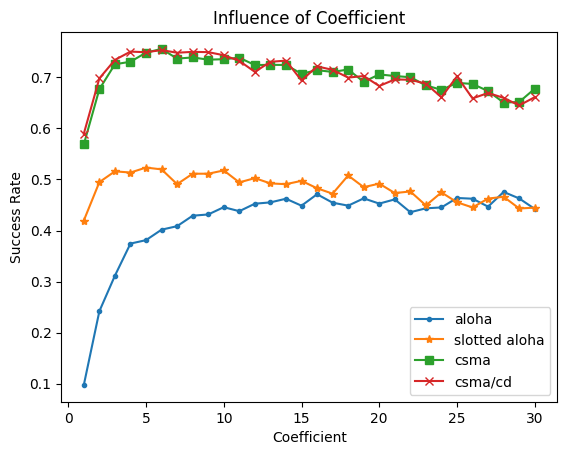

In [118]:
plt.plot(coefficient_list, aloha_success, marker = '.', label='aloha')
plt.plot(coefficient_list, slotted_success, marker = '*', label='slotted aloha')
plt.plot(coefficient_list, csma_success, marker = 's', label='csma')
plt.plot(coefficient_list, csmacd_success, marker = 'x', label='csma/cd')
plt.title("Influence of Coefficient")
plt.xlabel("Coefficient")
plt.ylabel("Success Rate")
plt.legend()
plt.show()

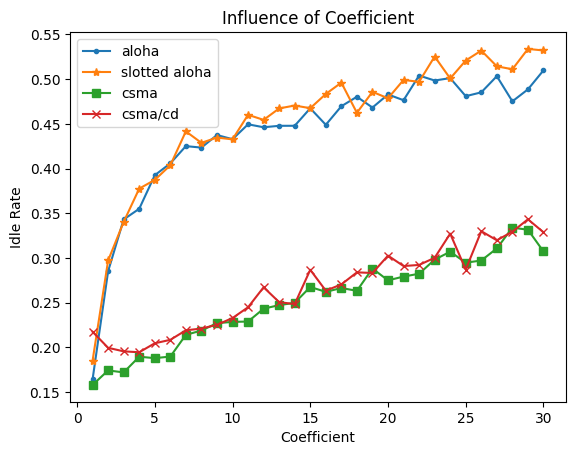

In [119]:
plt.plot(coefficient_list, aloha_idle, marker = '.', label='aloha')
plt.plot(coefficient_list, slotted_idle, marker = '*', label='slotted aloha')
plt.plot(coefficient_list, csma_idle, marker = 's', label='csma')
plt.plot(coefficient_list, csmacd_idle, marker = 'x', label='csma/cd')
plt.title("Influence of Coefficient")
plt.xlabel("Coefficient")
plt.ylabel("Idle Rate")
plt.legend()
plt.show()

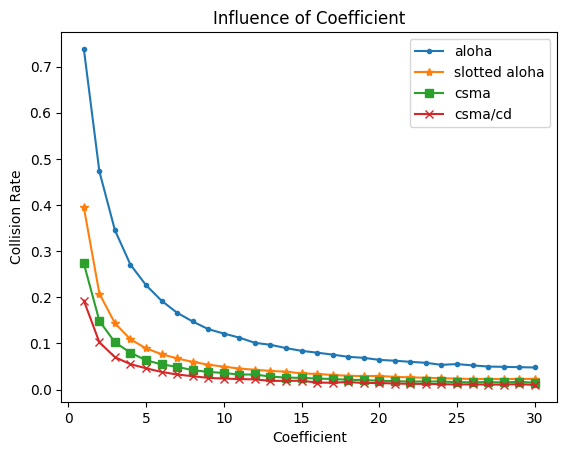

In [120]:
plt.plot(coefficient_list, aloha_collision, marker = '.', label='aloha')
plt.plot(coefficient_list, slotted_collision, marker = '*', label='slotted aloha')
plt.plot(coefficient_list, csma_collision, marker = 's', label='csma')
plt.plot(coefficient_list, csmacd_collision, marker = 'x', label='csma/cd')
plt.title("Influence of Coefficient")
plt.xlabel("Coefficient")
plt.ylabel("Collision Rate")
plt.legend()
plt.show()

##### Q5. Influence of Packet Num

In [137]:
packet_num_list = []

aloha_success = []
slotted_success = []
csma_success = []
csmacd_success = []

aloha_idle = []
slotted_idle = []
csma_idle = []
csmacd_idle = []

aloha_collision = []
slotted_collision = []
csma_collision = []
csmacd_collision = []

times = 100
for p in range(100, 1050, 50):
    packet_num_list.append(p)
    aloha_total_s = 0
    aloha_total_i = 0
    aloha_total_c = 0
    slotted_total_s = 0
    slotted_total_i = 0
    slotted_total_c = 0
    csma_total_s = 0
    csma_total_i = 0
    csma_total_c = 0
    csmacd_total_s = 0
    csmacd_total_i = 0
    csmacd_total_c = 0
    for ind in range(times):
        st = Setting(host_num=4, total_time=15000, packet_num=p, coefficient=3, packet_size=3, link_delay=1)
        s, i, c = aloha(st, show_history=False)
        aloha_total_s += s
        aloha_total_i += i
        aloha_total_c += c
        s, i, c = slotted_aloha(st, show_history=False)
        slotted_total_s += s
        slotted_total_i += i
        slotted_total_c += c
        s, i, c = csma(st, show_history=False)
        csma_total_s += s
        csma_total_i += i
        csma_total_c += c
        s, i, c = csma_cd(st, show_history=False)
        csmacd_total_s += s
        csmacd_total_i += i
        csmacd_total_c += c
    # aloha
    aloha_success.append(aloha_total_s/times)
    aloha_idle.append(aloha_total_i/times)
    aloha_collision.append(aloha_total_c/times)
    # slotted_aloha
    slotted_success.append(slotted_total_s/times)
    slotted_idle.append(slotted_total_i/times)
    slotted_collision.append(slotted_total_c/times)
    # csma
    csma_success.append(csma_total_s/times)
    csma_idle.append(csma_total_i/times)
    csma_collision.append(csma_total_c/times)
    # csma/cd
    csmacd_success.append(csmacd_total_s/times)
    csmacd_idle.append(csmacd_total_i/times)
    csmacd_collision.append(csmacd_total_c/times)

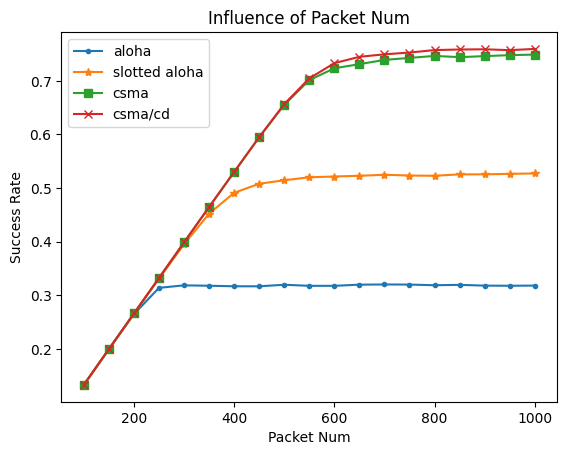

In [138]:
plt.plot(packet_num_list, aloha_success, marker = '.', label='aloha')
plt.plot(packet_num_list, slotted_success, marker = '*', label='slotted aloha')
plt.plot(packet_num_list, csma_success, marker = 's', label='csma')
plt.plot(packet_num_list, csmacd_success, marker = 'x', label='csma/cd')
plt.title("Influence of Packet Num")
plt.xlabel("Packet Num")
plt.ylabel("Success Rate")
plt.legend()
plt.show()

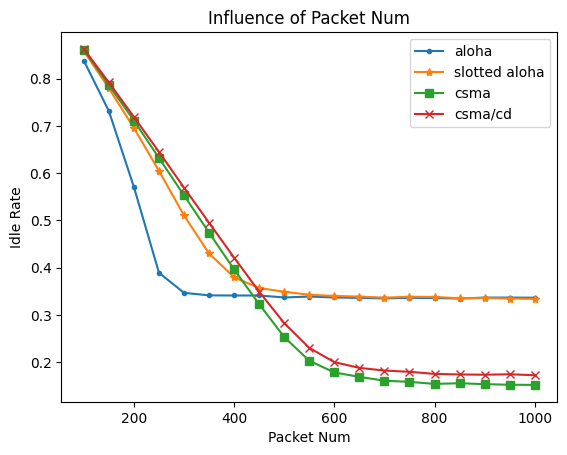

In [139]:
plt.plot(packet_num_list, aloha_idle, marker = '.', label='aloha')
plt.plot(packet_num_list, slotted_idle, marker = '*', label='slotted aloha')
plt.plot(packet_num_list, csma_idle, marker = 's', label='csma')
plt.plot(packet_num_list, csmacd_idle, marker = 'x', label='csma/cd')
plt.title("Influence of Packet Num")
plt.xlabel("Packet Num")
plt.ylabel("Idle Rate")
plt.legend()
plt.show()

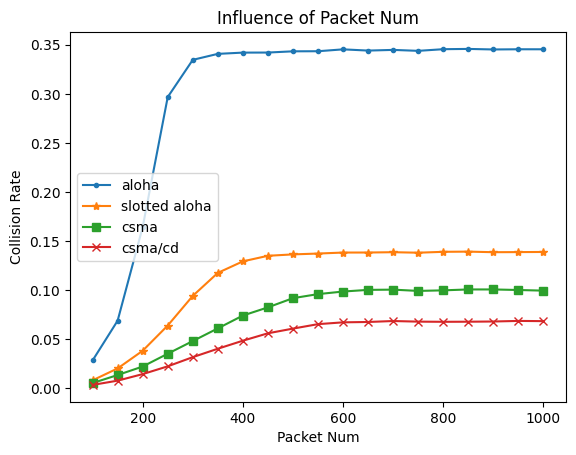

In [140]:
plt.plot(packet_num_list, aloha_collision, marker = '.', label='aloha')
plt.plot(packet_num_list, slotted_collision, marker = '*', label='slotted aloha')
plt.plot(packet_num_list, csma_collision, marker = 's', label='csma')
plt.plot(packet_num_list, csmacd_collision, marker = 'x', label='csma/cd')
plt.title("Influence of Packet Num")
plt.xlabel("Packet Num")
plt.ylabel("Collision Rate")
plt.legend()
plt.show()

##### Q6. Influence of Host Num

In [144]:
host_num_list = []

aloha_success = []
slotted_success = []
csma_success = []
csmacd_success = []

aloha_idle = []
slotted_idle = []
csma_idle = []
csmacd_idle = []

aloha_collision = []
slotted_collision = []
csma_collision = []
csmacd_collision = []

times = 100
for h in range(1, 11, 1):
    host_num_list.append(h)
    aloha_total_s = 0
    aloha_total_i = 0
    aloha_total_c = 0
    slotted_total_s = 0
    slotted_total_i = 0
    slotted_total_c = 0
    csma_total_s = 0
    csma_total_i = 0
    csma_total_c = 0
    csmacd_total_s = 0
    csmacd_total_i = 0
    csmacd_total_c = 0
    for ind in range(times):
        st = Setting(host_num=h, total_time=5000, packet_num=200, coefficient=3, packet_size=3, link_delay=1)
        s, i, c = aloha(st, show_history=False)
        aloha_total_s += s
        aloha_total_i += i
        aloha_total_c += c
        s, i, c = slotted_aloha(st, show_history=False)
        slotted_total_s += s
        slotted_total_i += i
        slotted_total_c += c
        s, i, c = csma(st, show_history=False)
        csma_total_s += s
        csma_total_i += i
        csma_total_c += c
        s, i, c = csma_cd(st, show_history=False)
        csmacd_total_s += s
        csmacd_total_i += i
        csmacd_total_c += c
    # aloha
    aloha_success.append(aloha_total_s/times)
    aloha_idle.append(aloha_total_i/times)
    aloha_collision.append(aloha_total_c/times)
    # slotted_aloha
    slotted_success.append(slotted_total_s/times)
    slotted_idle.append(slotted_total_i/times)
    slotted_collision.append(slotted_total_c/times)
    # csma
    csma_success.append(csma_total_s/times)
    csma_idle.append(csma_total_i/times)
    csma_collision.append(csma_total_c/times)
    # csma/cd
    csmacd_success.append(csmacd_total_s/times)
    csmacd_idle.append(csmacd_total_i/times)
    csmacd_collision.append(csmacd_total_c/times)

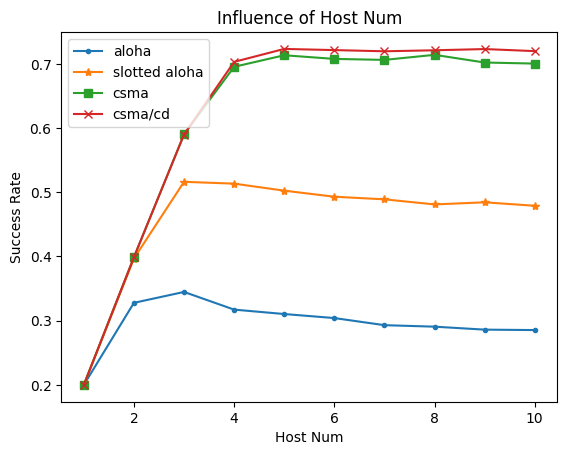

In [145]:
plt.plot(host_num_list, aloha_success, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_success, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_success, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_success, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Success Rate")
plt.legend()
plt.show()

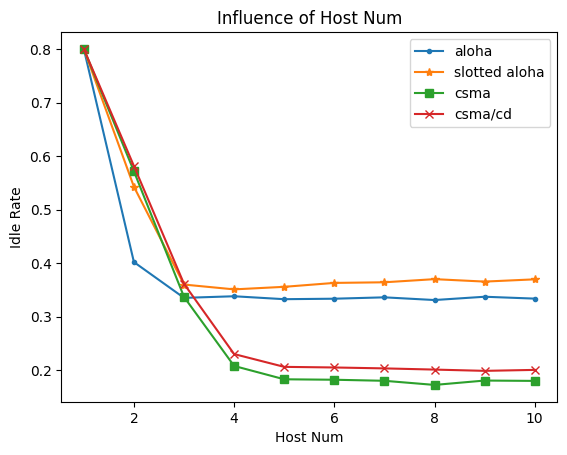

In [147]:
plt.plot(host_num_list, aloha_idle, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_idle, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_idle, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_idle, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Idle Rate")
plt.legend()
plt.show()

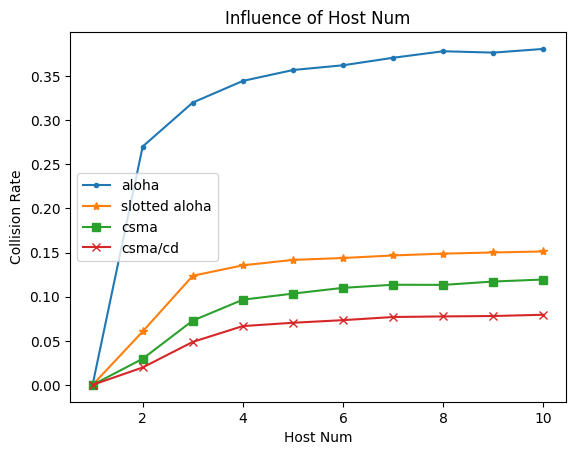

In [149]:
plt.plot(host_num_list, aloha_collision, marker = '.', label='aloha')
plt.plot(host_num_list, slotted_collision, marker = '*', label='slotted aloha')
plt.plot(host_num_list, csma_collision, marker = 's', label='csma')
plt.plot(host_num_list, csmacd_collision, marker = 'x', label='csma/cd')
plt.title("Influence of Host Num")
plt.xlabel("Host Num")
plt.ylabel("Collision Rate")
plt.legend()
plt.show()

##### Q7. Influence of Packet Size

In [433]:
packet_size_list = []

aloha_success = []
slotted_success = []
csma_success = []
csmacd_success = []

aloha_idle = []
slotted_idle = []
csma_idle = []
csmacd_idle = []

aloha_collision = []
slotted_collision = []
csma_collision = []
csmacd_collision = []

times = 100
for p in range(1, 20, 1):
    packet_size_list.append(p)
    aloha_total_s = 0
    aloha_total_i = 0
    aloha_total_c = 0
    slotted_total_s = 0
    slotted_total_i = 0
    slotted_total_c = 0
    csma_total_s = 0
    csma_total_i = 0
    csma_total_c = 0
    csmacd_total_s = 0
    csmacd_total_i = 0
    csmacd_total_c = 0
    for ind in range(times):
        st = Setting(host_num=4, total_time=5000, packet_num=100, coefficient=5, packet_size=p, link_delay=1)
        s, i, c = aloha(st, show_history=False)
        aloha_total_s += s
        aloha_total_i += i
        aloha_total_c += c
        s, i, c = slotted_aloha(st, show_history=False)
        slotted_total_s += s
        slotted_total_i += i
        slotted_total_c += c
        s, i, c = csma(st, show_history=False)
        csma_total_s += s
        csma_total_i += i
        csma_total_c += c
        s, i, c = csma_cd(st, show_history=False)
        csmacd_total_s += s
        csmacd_total_i += i
        csmacd_total_c += c
    # aloha
    aloha_success.append(aloha_total_s/times)
    aloha_idle.append(aloha_total_i/times)
    aloha_collision.append(aloha_total_c/times)
    # slotted_aloha
    slotted_success.append(slotted_total_s/times)
    slotted_idle.append(slotted_total_i/times)
    slotted_collision.append(slotted_total_c/times)
    # csma
    csma_success.append(csma_total_s/times)
    csma_idle.append(csma_total_i/times)
    csma_collision.append(csma_total_c/times)
    # csma/cd
    csmacd_success.append(csmacd_total_s/times)
    csmacd_idle.append(csmacd_total_i/times)
    csmacd_collision.append(csmacd_total_c/times)

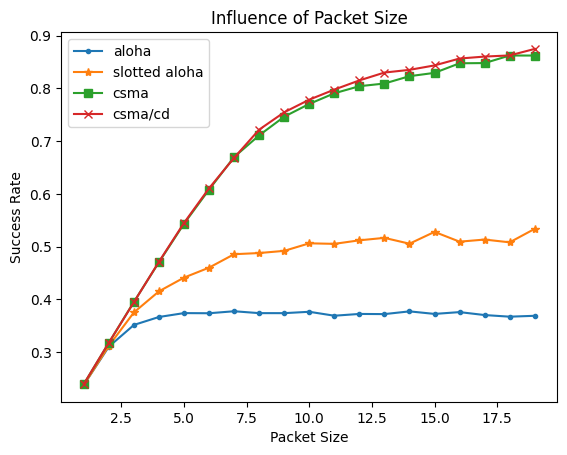

In [434]:
plt.plot(packet_size_list, aloha_success, marker = '.', label='aloha')
plt.plot(packet_size_list, slotted_success, marker = '*', label='slotted aloha')
plt.plot(packet_size_list, csma_success, marker = 's', label='csma')
plt.plot(packet_size_list, csmacd_success, marker = 'x', label='csma/cd')
plt.title("Influence of Packet Size")
plt.xlabel("Packet Size")
plt.ylabel("Success Rate")
plt.legend()
plt.show()

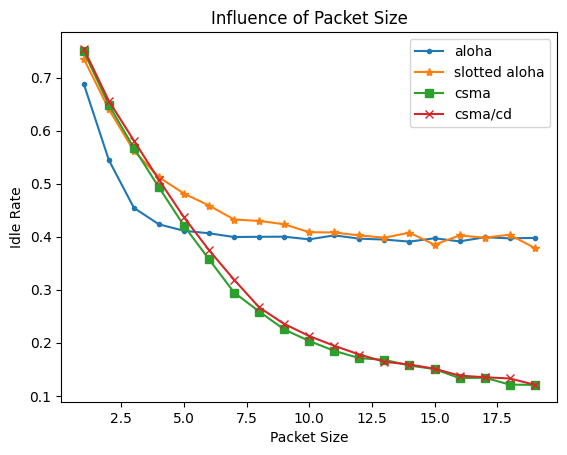

In [435]:
plt.plot(packet_size_list, aloha_idle, marker = '.', label='aloha')
plt.plot(packet_size_list, slotted_idle, marker = '*', label='slotted aloha')
plt.plot(packet_size_list, csma_idle, marker = 's', label='csma')
plt.plot(packet_size_list, csmacd_idle, marker = 'x', label='csma/cd')
plt.title("Influence of Packet Size")
plt.xlabel("Packet Size")
plt.ylabel("Idle Rate")
plt.legend()
plt.show()

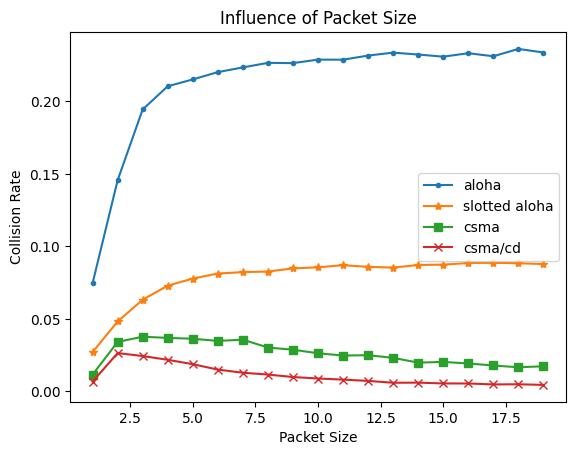

In [436]:
plt.plot(packet_size_list, aloha_collision, marker = '.', label='aloha')
plt.plot(packet_size_list, slotted_collision, marker = '*', label='slotted aloha')
plt.plot(packet_size_list, csma_collision, marker = 's', label='csma')
plt.plot(packet_size_list, csmacd_collision, marker = 'x', label='csma/cd')
plt.title("Influence of Packet Size")
plt.xlabel("Packet Size")
plt.ylabel("Collision Rate")
plt.legend()
plt.show()

##### Q8. Influence of Link Delay in CSMA and CSMA/CD

In [398]:
link_delay = [0,1,2,3]
packet_size_list = [7,5,3,1]

csma_success = []
csmacd_success = []

csma_idle = []
csmacd_idle = []

csma_collision = []
csmacd_collision = []

times = 100
for l, size in zip(link_delay, packet_size_list):
    csma_total_s = 0
    csma_total_i = 0
    csma_total_c = 0
    csmacd_total_s = 0
    csmacd_total_i = 0
    csmacd_total_c = 0
    for ind in range(times):
        st = Setting(host_num=4, total_time=200, packet_num=10, coefficient=10, packet_size=size, link_delay=l)
        s, i, c = csma(st, show_history=False)
        csma_total_s += s
        csma_total_i += i
        csma_total_c += c
        s, i, c = csma_cd(st, show_history=False)
        csmacd_total_s += s
        csmacd_total_i += i
        csmacd_total_c += c
    # csma
    csma_success.append(csma_total_s/times)
    csma_idle.append(csma_total_i/times)
    csma_collision.append(csma_total_c/times)
    # csma/cd
    csmacd_success.append(csmacd_total_s/times)
    csmacd_idle.append(csmacd_total_i/times)
    csmacd_collision.append(csmacd_total_c/times)

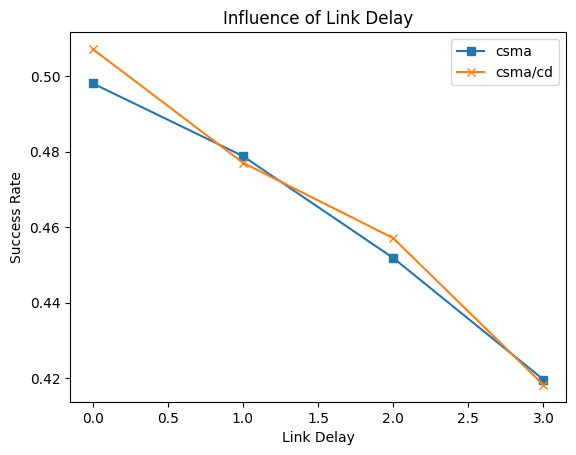

In [399]:
plt.plot(link_delay, csma_success, marker = 's', label='csma')
plt.plot(link_delay, csmacd_success, marker = 'x', label='csma/cd')
plt.title("Influence of Link Delay")
plt.xlabel("Link Delay")
plt.ylabel("Success Rate")
plt.legend()
plt.show()

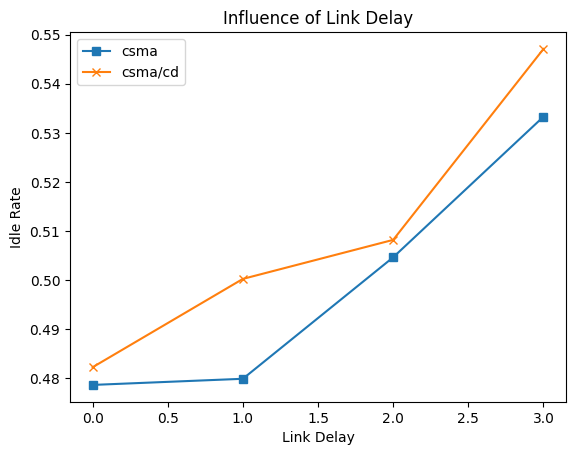

In [400]:
plt.plot(link_delay, csma_idle, marker = 's', label='csma')
plt.plot(link_delay, csmacd_idle, marker = 'x', label='csma/cd')
plt.title("Influence of Link Delay")
plt.xlabel("Link Delay")
plt.ylabel("Idle Rate")
plt.legend()
plt.show()

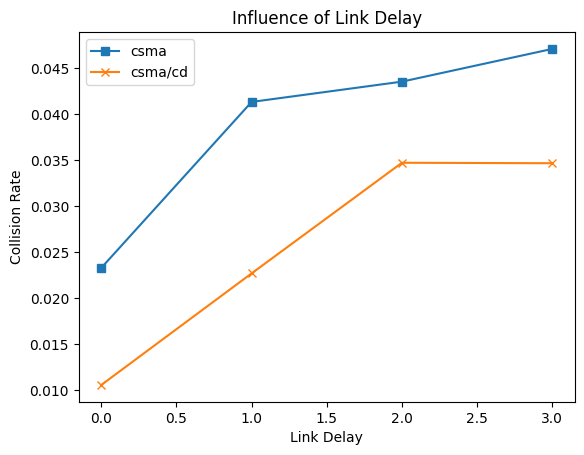

In [401]:
plt.plot(link_delay, csma_collision, marker = 's', label='csma')
plt.plot(link_delay, csmacd_collision, marker = 'x', label='csma/cd')
plt.title("Influence of Link Delay")
plt.xlabel("Link Delay")
plt.ylabel("Collision Rate")
plt.legend()
plt.show()